# Qualitative analysis of the occupations

In this notebook, we will analyze the occupations of the individuals. There is a multiple of occupations so we will use several filters to reduce the number of them. Also, each occupation will compare to the type of the individuals: "jurist", "economist" and "jurist/economist". Finally, we can appreciate the evolution of the differents of occupation in the time.

In [42]:
# Import of the libraries

from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pprint
import csv
import ast
import re

In [43]:
import sparql_functions as spqf

In [44]:
### Execution of queries necessary

In [68]:
### It's define the database ligne to use
pk_query = 107

# Connexion to the database
original_db = 'data/sparql_queries.db'
conn = sql.connect(original_db)

c = conn.cursor()

### It runs the query on the SQLite database to get the row values 
c.execute('SELECT * FROM query WHERE pk_query = ?', [pk_query]) ### a list around argument is needed for a string longer then one
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchone()

# close connexion
conn.close()


In [69]:
print(rc[2] +  "\n-----\n" + rc[4] +  "\n-----\n" +   rc[7]+  "\n\n\n------------------\n" +  rc[5] + "\n\n\n------------------\n")

 /
-----
http://localhost:7200/repositories/IMPORT
-----
2021-06-23 15:37:43


------------------
PREFIX  egr:  <http://rdvocab.info/ElementsGr2/>
PREFIX  owl:  <http://www.w3.org/2002/07/owl#>
PREFIX  rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX  ome:  <https://ontome.net/class/>
PREFIX  wdt:  <http://www.wikidata.org/prop/direct/>
PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
PREFIX  bio:  <http://vocab.org/bio/0.1/>
PREFIX  rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX  wd:   <http://www.wikidata.org/entity/>


            SELECT DISTINCT ?occupation ?count_occupation
              WHERE
{ {
            SELECT DISTINCT ?occupation ?count_occupation
              WHERE
    			{ SELECT DISTINCT  ?occupation(count(?occupation) AS ?count_occupation)
                    WHERE
                      { ?person  wdt:P569    ?bD ;
                                 wdt:P21     ?gen ;
                                 wdt:P69     ?educatedAt .
                        ?gen

In [70]:
### Execute the SPARQL query wrapped in the function in the library _sparql_functions.py_
# The first setting correspond to SPARQL Endpoint, the seconde to the query
q = spqf.get_json_sparql_result(rc[4],rc[5])

<class 'dict'>


In [71]:
##### Transform the result into a list with a fonction of the library #####
#### Result of the query
r_query = [l for l in spqf.sparql_result_to_list(q)]
print(len(r_query))
#r_query

97


In [15]:
### Create a dataframe
df_result = pd.DataFrame(r_query)
df_result.columns =['id_entity', 'occupation', 'year', 'type']
df_result[:15]

,id_entity,occupation,year,type
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,politician,1959,economist
1,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,pianist,1959,economist
2,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,politician,1884,jurist
3,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,journalist,1884,jurist
4,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,politician,1940,economist
5,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,politician,1907,jurist
6,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,politician,1927,jurist|jurist
7,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,entrepreneur,1927,jurist|jurist
8,urn:uuid:9179aad4-9c44-4d9b-98f6-9d97ad36baa6,politician,1833,jurist
9,urn:uuid:f4d660c4-0a91-4a26-b73e-fee221b0919a,politician,1934,jurist


In [16]:
### We encode to obtain of three types: "jurist", "economist" and "jurist/economist"  
## ( In the SPARQL query, a concatenation of the type has been processed cf. SQLite: query n°106)
df_result['type'].replace(["jurist|jurist", "jurist|jurist|jurist", "jurist|jurist|jurist|jurist", "legal jurist in France", "jurist|legal jurist in France"],'jurist',inplace=True)
df_result['type'].replace(["jurist|jurist|economist", "jurist|jurist|jurist|economist", "jurist|jurist|jurist|jurist", "jurist|economist|jurist", "economist|jurist", "jurist|economist"],'jurist/economist',inplace=True)


In [17]:
df_result.sort_values(by=['id_entity'])

,id_entity,occupation,year,type
374,urn:uuid:000112b4-4917-4e23-a009-0c9bf8b6457b,politician,1955,jurist
6128,urn:uuid:00033b44-dea6-4a45-bd42-c4995e5e3919,politician,1848,jurist
23752,urn:uuid:0005ad09-b055-41d6-b1ef-fdcc01a486d7,politician,1844,jurist
46199,urn:uuid:00080459-4f26-41f7-984d-cffc000c95ab,model,1988,jurist
11734,urn:uuid:00085937-75d7-4b71-a47d-636951c7051f,writer,1936,jurist
...,...,...,...,...
9583,urn:uuid:fffa541a-7c2e-407a-a9a4-b9faa4abd267,journalist,1932,economist
27715,urn:uuid:fffee4db-7cfc-453f-8bd8-40faadc74038,writer,1896,economist
16199,urn:uuid:ffff6c62-8684-4ebf-8966-3539c5fdf784,journalist,1954,economist
16198,urn:uuid:ffff6c62-8684-4ebf-8966-3539c5fdf784,writer,1954,economist


In [18]:
# Export dataframe in a CSV format
## This is useful to do not run again the query
df_result.to_csv('spreadsheets/occupations.csv', sep="|",index=False) 

In [5]:
occupation= pd.read_csv('spreadsheets/occupations.csv', sep="|")

In [6]:
### group the occupations with group by
gb_occupation = occupation.groupby(['occupation']).size()
gb_occupation.sort_values(ascending = False)

occupation
politician            26652
university teacher     4914
writer                 2803
diplomat               2391
journalist             2002
                      ...  
breeder                   1
boxing promoter           1
bowler                    1
monk                      1
Academy of Finland        1
Length: 1522, dtype: int64

In [7]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
# continent is defined as an index
df_occupation = gb_occupation.to_frame()
df_occupation.columns = ['frequency']

In [22]:
### create a new column with the frequencies of the occupations
## Only the frequencies superiors to one hundred are kept
df_occupation_1 = df_occupation[df_occupation['frequency'] > 100]
df_occupation_1.sort_values(by="frequency", ascending = False)

,frequency
occupation,
politician,26652
university teacher,4914
writer,2803
diplomat,2391
journalist,2002
historian,1016
businessperson,996
banker,756
military officer,696


In [72]:
# Creation another dataframe to preserve only the occupations with a great frequency
# This dataframe is realize with a SPARQL query.
# These occupations will merge with the individuals after.
df_result = pd.DataFrame(r_query)
df_result.columns =['occupation', 'count_occupation']
df_result[:15]

,occupation,count_occupation
0,politician,45482
1,university teacher,9150
2,writer,5339
3,diplomat,4557
4,journalist,3588
5,businessperson,1976
6,historian,1897
7,banker,1526
8,military officer,1426
9,professor,1068


In [73]:
df_result.to_csv('spreadsheets/occupations_count.csv', sep="|",index=False) 

In [74]:
c_occ= pd.read_csv('spreadsheets/occupations_count.csv', sep="|")
c_occ[:50]

,occupation,count_occupation
0,politician,45482
1,university teacher,9150
2,writer,5339
3,diplomat,4557
4,journalist,3588
5,businessperson,1976
6,historian,1897
7,banker,1526
8,military officer,1426
9,professor,1068


In [75]:
merged=pd.merge(occupation, c_occ,on='occupation', how='inner', sort=False)
merged[:10]

,id_entity,occupation,year,type,count_occupation
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,politician,1959,economist,45482
1,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,politician,1884,jurist,45482
2,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,politician,1940,economist,45482
3,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,politician,1907,jurist,45482
4,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,politician,1927,jurist,45482
5,urn:uuid:9179aad4-9c44-4d9b-98f6-9d97ad36baa6,politician,1833,jurist,45482
6,urn:uuid:f4d660c4-0a91-4a26-b73e-fee221b0919a,politician,1934,jurist,45482
7,urn:uuid:42059454-7941-47d7-9bc7-5ec28743220c,politician,1954,jurist,45482
8,urn:uuid:fb8010fe-ab7c-4f8f-a851-7a07bcec70e2,politician,1964,jurist,45482
9,urn:uuid:540d8caa-be15-478e-974f-50f02ddf2680,politician,1922,jurist,45482


#### Encode the occupations
We encode the occupations and regroup them together for having less.

In [76]:

### artist
merged['occupation'].replace(["photographer", "musician", "singer", "painter", "composer", "film actor"],'artist',inplace=True)
### writer
merged['occupation'].replace(["writer", "novelist", "non-fiction writer", "author", "poet", "children's writer" , "playwright", "biographer", "autobiographer", "essayist", "screenwriter", "poet lawyer"],'writer',inplace=True)
### politician
merged['occupation'].replace(["diplomat","official", "statesperson", "minister"],'politician',inplace=True)
### soldier
merged['occupation'].replace(["military officer", "military personnel"],'soldier',inplace=True)
### social researcher
merged['occupation'].replace(["linguist", "historian", "philosopher", "political scientist", "sociologist", "geographer", "anthropologist", "legal historian"],'social researcher',inplace=True)
### activist
merged['occupation'].replace(["human rights activist", "feminist", "peace activist", "environmentalist"],'activist',inplace=True)
### journalist
merged['occupation'].replace(["columnist", "opinion journalist"],'journalist',inplace=True)
### academic
merged['occupation'].replace(["lecturer", "university teacher", "professor", "full professor", "legal scholar"],'academic',inplace=True)
### businessperson
merged['occupation'].replace(["manager", "business executive", "entrepreneur", "chief executive officer", "director"],'businessperson',inplace=True)
## athlete
merged['occupation'].replace(["American football player", "cricketer", "basketball player", "cricketer", "athletics competitor", "association football player"],'athlete',inplace=True)
### banker
merged['occupation'].replace(["financier"],'banker',inplace=True)
### teacher
merged['occupation'].replace(["pedagogue"],'teacher',inplace=True)
### media person
merged['occupation'].replace(["television presenter", "television actor", "television producer", "radio personality", "film producer", "film director", "public figure"],'media person',inplace=True)
### religious
merged['occupation'].replace(["theologian", "television actor", "Catholic priest", "priest"],'religious',inplace=True)
### scientist
merged['occupation'].replace(["mathematician", "scientist", "statistician", "physician", "researcher"],'scientist',inplace=True)
### other
merged['occupation'].replace(["civil servant", "translator", "engineer", "trade unionist", "actor", "farmer", "publisher", "literary critic", "notary","slaveholder", "librarian", "agronomist", "psychologist", "contributing editor", "police officer", "blogger","consultant", "editor", "lobbyist"],'other',inplace=True)


In [77]:
coded_occupations=merged[["id_entity","occupation",'type']].drop_duplicates()
print(len(coded_occupations))
coded_occupations.set_index('id_entity',inplace=True)

50255


In [78]:
gb_coded_occupations = coded_occupations.groupby('occupation').size()
gb_coded_occupations.sort_values(ascending = False).head(50)

occupation
politician           27621
academic              5871
writer                3684
other                 2382
journalist            2202
social researcher     1993
businessperson        1477
soldier                937
banker                 805
teacher                728
scientist              697
activist               513
athlete                418
media person           390
artist                 356
religious              181
dtype: int64

In [79]:
### Transform the object 'Series' into a DataFrame and add the label of the 'frequency' column
df_coded_occ = gb_coded_occupations.to_frame()
df_coded_occ.columns = ['frequency']
print(len(df_coded_occ))
#df_coded_occ

16


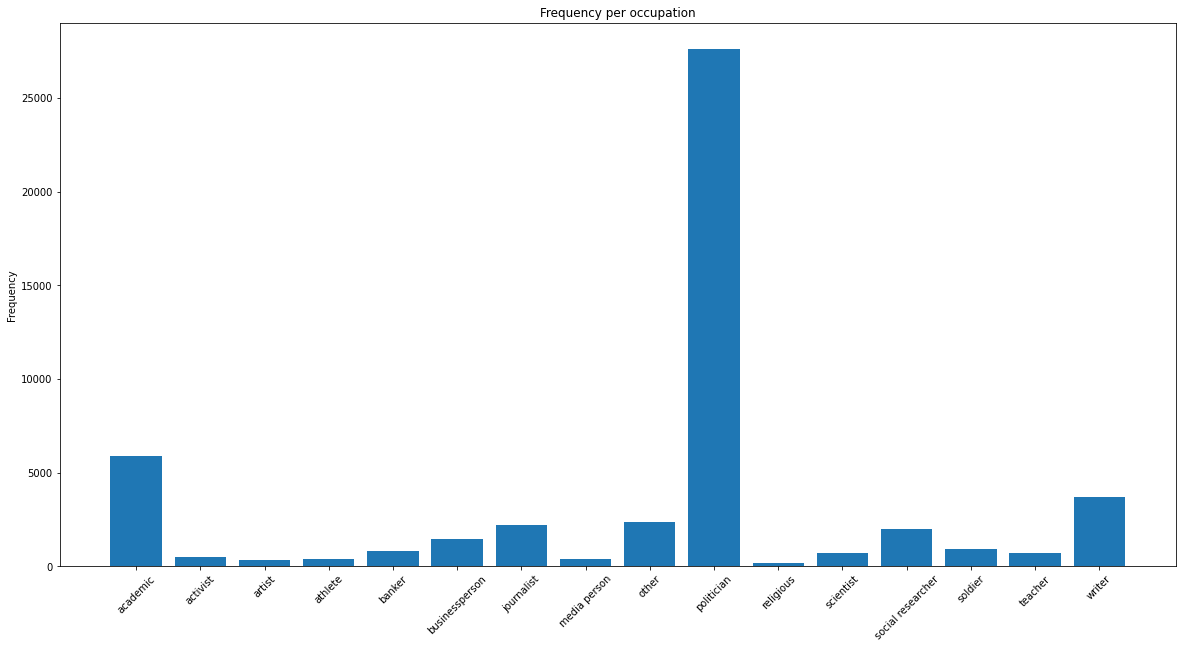

In [80]:
objects = [l for l in df_coded_occ.index]
eff = [l for l in df_coded_occ['frequency']]

p1 = plt.bar(objects, eff)

plt.ylabel('Frequency')
plt.title('Frequency per occupation')
plt.gcf().set_size_inches(20, 10)
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.savefig('exported_pictures/nationalities/Frequency_continent.png', dpi=100, bbox_inches = "tight") #pdf, svg
plt.xticks(rotation=45)
plt.show()


NameError: name 'mosaic' is not defined

## Contingency table between occupations and types

In [81]:
# to create a contingency table: cf.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
Y = "occupation"  
X = "type"

contingency = merged[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len).fillna(0).astype(int) 
contingency

type,economist,jurist,jurist/economist
occupation,,,
academic,2476,3585,122
activist,79,455,6
artist,64,329,5
athlete,31,406,3
banker,538,246,42
businessperson,538,1017,18
journalist,464,1738,47
media person,80,387,2
other,643,1821,23


Text(0.5, 0, 'occupation (%)')

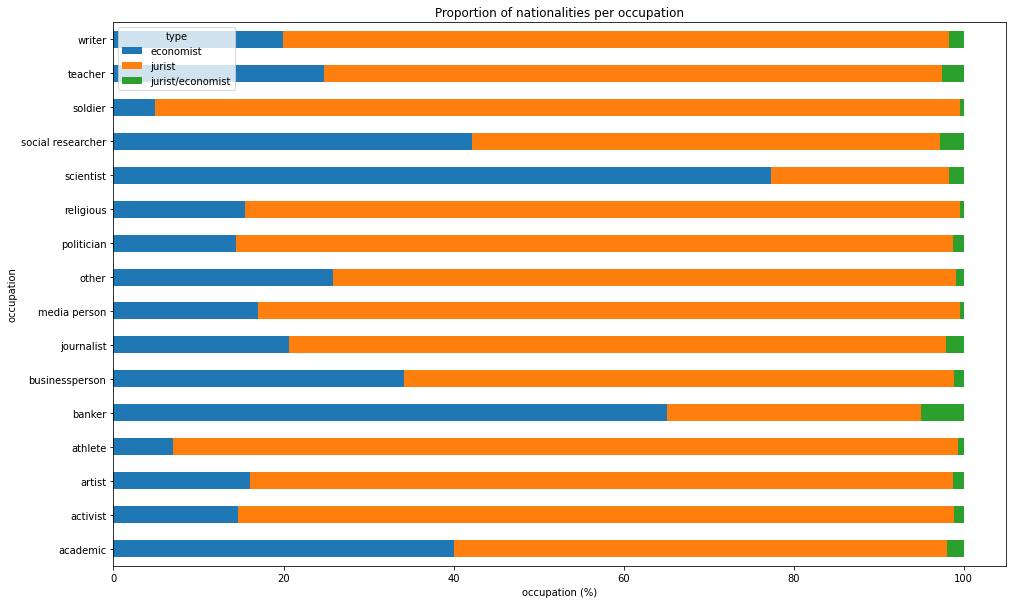

In [82]:
### https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

stacked_data = contingency.apply(lambda x: x*100/sum(x), axis=1)
p = stacked_data.plot(kind="barh", stacked=True, figsize=(16,10), title='Proportion of nationalities per occupation')
plt.xlabel("occupation (%)")

In [83]:
# Same contingency table with margins: cf.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
Y = "occupation"  
X = "type"

contingency_total = merged[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len,  margins=True, margins_name='Total').fillna(0).astype(int) 
contingency_total

type,economist,jurist,jurist/economist,Total
occupation,,,,
academic,2476,3585,122,6183
activist,79,455,6,540
artist,64,329,5,398
athlete,31,406,3,440
banker,538,246,42,826
businessperson,538,1017,18,1573
journalist,464,1738,47,2249
media person,80,387,2,469
other,643,1821,23,2487


### factorial correspondence analysis

In [134]:
mergFilter=merged[merged['type'] != "jurist/economist"]
mergFilter

,id_entity,occupation,year,type,count_occupation
0,urn:uuid:fb3527da-478c-4e4f-a861-9de00b9d154b,politician,1959,economist,45482
1,urn:uuid:9ce56c33-08da-497c-afb0-38cb6ff6536c,politician,1884,jurist,45482
2,urn:uuid:2178758f-d8df-447d-b64b-bd78dfe045b7,politician,1940,economist,45482
3,urn:uuid:490ab506-b377-4e39-bf39-3d6e3f732a62,politician,1907,jurist,45482
4,urn:uuid:41ad1b0e-5f5e-43b6-9137-ea5f6bfe3cf4,politician,1927,jurist,45482
...,...,...,...,...,...
54117,urn:uuid:372c7ece-72e9-41c2-85d5-a7db48416e0a,athlete,1940,jurist,159
54118,urn:uuid:e84e1f97-1c70-484d-aefb-139000544115,athlete,1969,jurist,159
54119,urn:uuid:637bdebc-2cdc-4d37-8d3d-65eb4207b6ea,athlete,1940,jurist,159
54120,urn:uuid:259ef0ec-9d87-4d3c-bcb5-842110203f13,athlete,1882,jurist,159


In [176]:
contingFilter = mergFilter[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len).fillna(0).astype(int) 
contingFilter

type,economist,jurist
occupation,,
academic,2476,3585
activist,79,455
artist,64,329
athlete,31,406
banker,538,246
businessperson,538,1017
journalist,464,1738
media person,80,387
other,643,1821


In [177]:
tot_line= np.sum(contingFilter.values,axis=1)
print(tot_line)
tot_col = np.sum(contingFilter.values,axis=0)
print(tot_col)

[ 6061   534   393   437   784  1555  2202   467  2464 29015   200   729
  2227   948   741  4551]
[11873 41435]


In [178]:
#profils lignes
prof_line = np.apply_along_axis(arr=contingFilter.values,axis=1,func1d=lambda x:x/np.sum(x))
print(prof_line)

[[0.40851345 0.59148655]
 [0.14794007 0.85205993]
 [0.16284987 0.83715013]
 [0.07093822 0.92906178]
 [0.68622449 0.31377551]
 [0.34598071 0.65401929]
 [0.21071753 0.78928247]
 [0.17130621 0.82869379]
 [0.26095779 0.73904221]
 [0.14589006 0.85410994]
 [0.155      0.845     ]
 [0.78737997 0.21262003]
 [0.4337674  0.5662326 ]
 [0.04852321 0.95147679]
 [0.2537112  0.7462888 ]
 [0.20259284 0.79740716]]


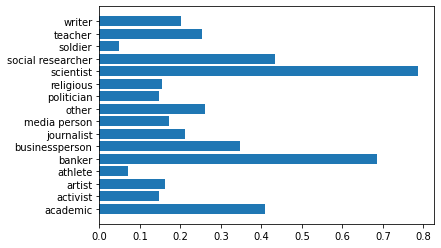

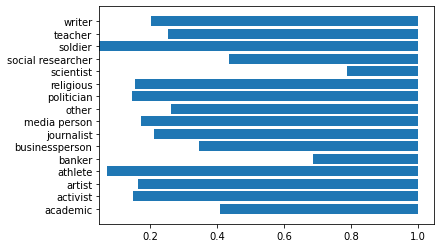

In [179]:
import matplotlib.pyplot as plt
sum_cont = np.zeros(shape=(prof_line.shape[0]))
for i in range(prof_line.shape[1]):
    plt.barh(range(prof_line.shape[0]),prof_line[:,i],left=sum_cont)
    sum_cont = sum_cont + prof_line[:,i]
    plt.yticks(range(prof_line.shape[0]),contingFilter.index)
    plt.show()

In [180]:
prof_marg_line = tot_col/np.sum(tot_col)
print(prof_marg_line)

[0.22272454 0.77727546]


In [181]:
distPairesLig = np.zeros(shape=(prof_line.shape[0],prof_line.shape[0]))
for i in range(prof_line.shape[0]-1):
    for j in range(i+1,prof_line.shape[0]):
        distPairesLig[i,j] = np.sum((prof_line[i,:]-prof_line[j,:])**2/prof_marg_line)

In [182]:
print(pd.DataFrame(distPairesLig,index=contingFilter.index,columns=contingFilter.index))

occupation         academic  activist    artist   athlete    banker  \
occupation                                                            
academic                0.0  0.392209  0.348609  0.658261  0.445495   
activist                0.0  0.000000  0.001284  0.034250  1.673711   
artist                  0.0  0.000000  0.000000  0.048798  1.582276   
athlete                 0.0  0.000000  0.000000  0.000000  2.186812   
banker                  0.0  0.000000  0.000000  0.000000  0.000000   
businessperson          0.0  0.000000  0.000000  0.000000  0.000000   
journalist              0.0  0.000000  0.000000  0.000000  0.000000   
media person            0.0  0.000000  0.000000  0.000000  0.000000   
other                   0.0  0.000000  0.000000  0.000000  0.000000   
politician              0.0  0.000000  0.000000  0.000000  0.000000   
religious               0.0  0.000000  0.000000  0.000000  0.000000   
scientist               0.0  0.000000  0.000000  0.000000  0.000000   
social

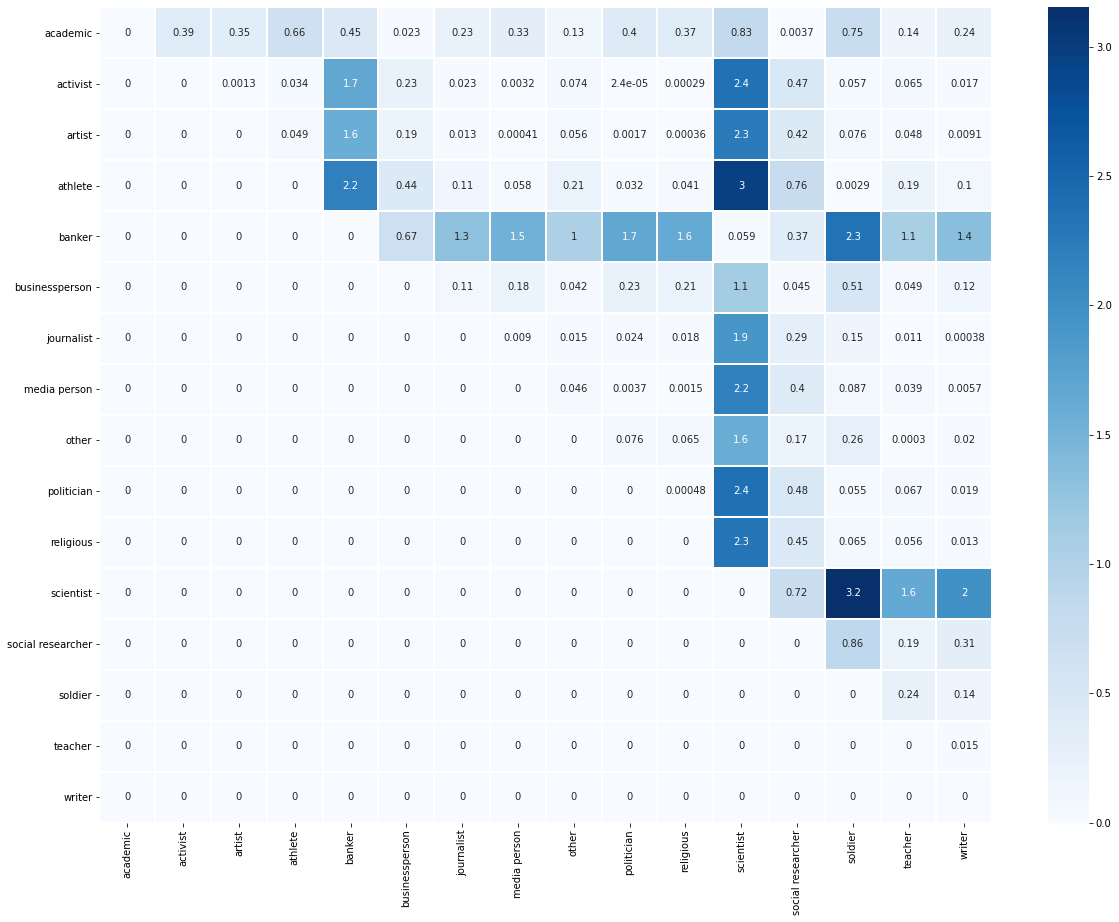

In [183]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,15))
p=sns.heatmap(distPairesLig,vmin=0,vmax=np.max(distPairesLig),linewidth=0.1,cmap=
'Blues',xticklabels=contingFilter.index,yticklabels=contingFilter.index,annot=True, ax=ax)

In [184]:
#distance à l'origine
distLine = np.apply_along_axis(arr=prof_line,axis=1,func1d=lambda x:np.sum((x
-prof_marg_line)**2/prof_marg_line))
#display
print(pd.DataFrame(distLine,index=contingFilter.index))

                          0
occupation                 
academic           0.199387
activist           0.032306
artist             0.020708
athlete            0.133083
banker             1.240956
businessperson     0.087755
journalist         0.000833
media person       0.015272
other              0.008444
politician         0.034101
religious          0.026494
scientist          1.841722
social researcher  0.257275
soldier            0.175291
teacher            0.005546
writer             0.002341


In [185]:
weiLine = tot_line/np.sum(tot_line)

In [186]:
inertiaLine = distLine * weiLine

In [187]:
print(pd.DataFrame(np.transpose([distLine,weiLine,inertiaLine]),columns=['DistLine','Weigth','Inertia'],index=contingFilter.index))

                   DistLine    Weigth   Inertia
occupation                                     
academic           0.199387  0.113698  0.022670
activist           0.032306  0.010017  0.000324
artist             0.020708  0.007372  0.000153
athlete            0.133083  0.008198  0.001091
banker             1.240956  0.014707  0.018251
businessperson     0.087755  0.029170  0.002560
journalist         0.000833  0.041307  0.000034
media person       0.015272  0.008760  0.000134
other              0.008444  0.046222  0.000390
politician         0.034101  0.544290  0.018561
religious          0.026494  0.003752  0.000099
scientist          1.841722  0.013675  0.025186
social researcher  0.257275  0.041776  0.010748
soldier            0.175291  0.017783  0.003117
teacher            0.005546  0.013900  0.000077
writer             0.002341  0.085372  0.000200


In [188]:
tot_InertiaLine = np.sum(inertiaLine)
print(tot_InertiaLine)

0.10359463890334716


In [189]:
from fanalysis.ca import CA

In [190]:
afc = CA(row_labels=contingFilter.index,col_labels=contingFilter.columns)

In [191]:
afc.fit(contingFilter.values)

CA(col_labels=Index(['economist', 'jurist'], dtype='object', name='type'),
   row_labels=Index(['academic', 'activist', 'artist', 'athlete', 'banker', 'businessperson',
       'journalist', 'media person', 'other', 'politician', 'religious',
       'scientist', 'social researcher', 'soldier', 'teacher', 'writer'],
      dtype='object', name='occupation'))

In [192]:
print(afc.eig_)

[[  0.10359464]
 [100.        ]
 [100.        ]]


In [175]:
print(pd.DataFrame(afc.row_coord_,index=contingFilter.index))

                          0
occupation                 
academic          -0.446528
activist           0.179738
artist             0.143904
athlete            0.364805
banker            -1.113982
businessperson    -0.296236
journalist         0.028858
media person       0.123580
other             -0.091890
politician         0.184665
religious          0.162770
scientist         -1.357100
social researcher -0.507223
soldier            0.418678
teacher           -0.074474
writer             0.048385


In [163]:
print(np.sum(weiLine * afc.row_coord_[:,0]))

-2.7755575615628914e-17


In [164]:
print(np.sum(weiLine * afc.row_coord_[:,0]**2))

0.10359463890334712


IndexError: index 1 is out of bounds for axis 1 with size 1

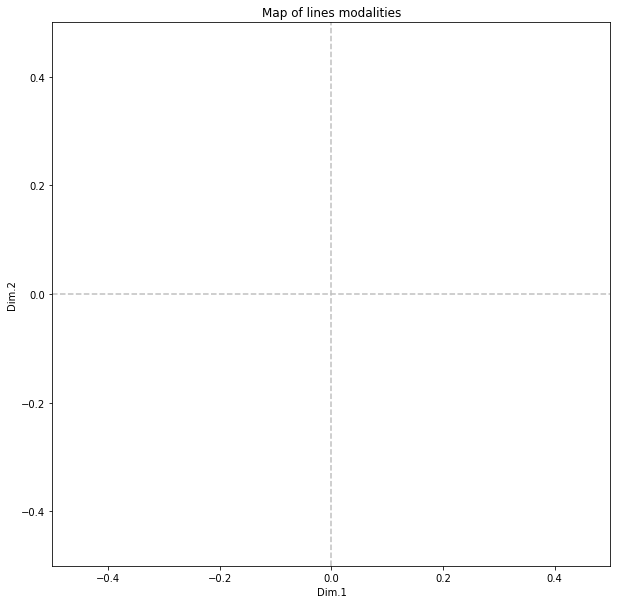

In [169]:
#display in the first factorial plane
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Map of lines modalities")

for i in range(contingFilter.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],contingFilter.index[i])

#plt.show()

In [106]:
prof_marg_col = tot_line/np.sum(tot_line)
print(prof_marg_col)

[0.1142419  0.00997746 0.00735376 0.00812978 0.01526182 0.02906397
 0.04155427 0.00866561 0.04595174 0.54288459 0.00371383 0.01370977
 0.04231181 0.01758989 0.01404235 0.08554747]


In [107]:
prof_col = np.apply_along_axis(arr=contingency.values,axis=0,func1d=lambda x:x/np.sum(x))
print(pd.DataFrame(prof_col,index=contingency.index,columns=contingency.columns))

type               economist    jurist  jurist/economist
occupation                                              
academic            0.208540  0.086521          0.149877
activist            0.006654  0.010981          0.007371
artist              0.005390  0.007940          0.006143
athlete             0.002611  0.009798          0.003686
banker              0.045313  0.005937          0.051597
businessperson      0.045313  0.024544          0.022113
journalist          0.039080  0.041945          0.057740
media person        0.006738  0.009340          0.002457
other               0.054156  0.043948          0.028256
politician          0.356523  0.598093          0.450860
religious           0.002611  0.004079          0.001229
scientist           0.048345  0.003741          0.015971
social researcher   0.081361  0.030433          0.077396
soldier             0.003874  0.021769          0.004914
teacher             0.015834  0.013346          0.023342
writer              0.077655  0

In [108]:
distCol = np.apply_along_axis(arr=prof_col,axis=0,func1d=lambda x:np.sum((x
-prof_marg_col)**2/prof_marg_col))

In [109]:
print(pd.DataFrame(distCol,index=contingency.columns))

                         0
type                      
economist         0.353002
jurist            0.031070
jurist/economist  0.183727


In [110]:
weiCol = tot_col/np.sum(tot_col)
print(pd.DataFrame(weiCol,index=contingency.columns))

                         0
type                      
economist         0.219375
jurist            0.765585
jurist/economist  0.015040


In [112]:
#inertia
inertiaCol = distCol*weiCol
print(pd.DataFrame(inertiaCol,index=contingency.columns))

                         0
type                      
economist         0.077440
jurist            0.023787
jurist/economist  0.002763


In [113]:
print(np.sum(inertiaCol))

0.10398993632534854


In [114]:
print(pd.DataFrame(afc.col_coord_,index=contingency.columns))

                         0         1
type                                
economist        -0.594001  0.012853
jurist            0.176254  0.002178
jurist/economist -0.307748 -0.298360


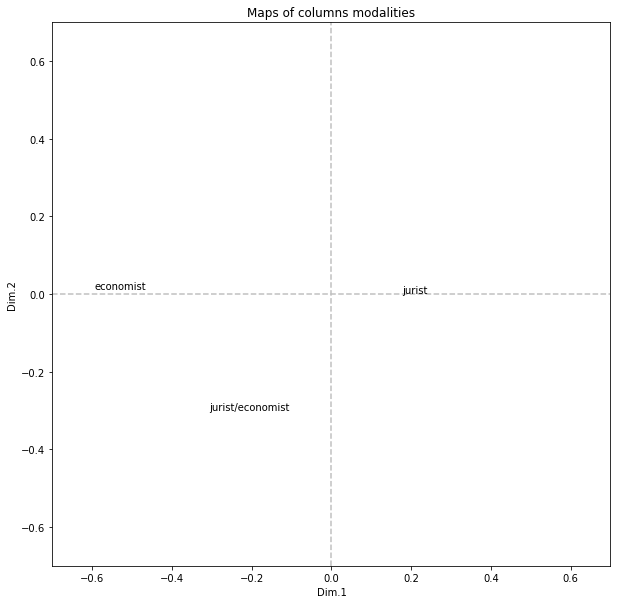

In [117]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Maps of columns modalities")

for i in range(contingency.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],contingency.columns[i])

plt.show()

In [122]:
n= np.sum(contingency.values)

In [123]:
E = np.dot(np.reshape(tot_line,(16,1)),np.reshape(tot_col,(1,3)))/n
print(E)

[[1.35639405e+03 4.73361304e+03 9.29929049e+01]
 [1.18462363e+02 4.13415986e+02 8.12165108e+00]
 [8.73111489e+01 3.04702893e+02 5.98595765e+00]
 [9.65248882e+01 3.36857470e+02 6.61764162e+00]
 [1.81203540e+02 6.32373342e+02 1.24231181e+01]
 [3.45076475e+02 1.20426546e+03 2.36580688e+01]
 [4.93373804e+02 1.72180102e+03 3.38251728e+01]
 [1.02886756e+02 3.59059440e+02 7.05380437e+00]
 [5.45584993e+02 1.90401029e+03 3.74047153e+01]
 [6.44566879e+03 2.24944232e+04 4.41908060e+02]
 [4.40943239e+01 1.53882617e+02 3.02305901e+00]
 [1.62776061e+02 5.68064188e+02 1.11597502e+01]
 [5.02368168e+02 1.75319002e+03 3.44418166e+01]
 [2.08844758e+02 7.28837072e+02 1.43181701e+01]
 [1.66724807e+02 5.81844721e+02 1.14304719e+01]
 [1.01570507e+03 3.54465929e+03 6.96356380e+01]]


In [124]:
KHI2 = np.sum(((contingency.values-E)**2)/E)
print(KHI2)

5628.143333800515


In [125]:
ddl = (E.shape[0]-1)*(E.shape[1]-1)
print(ddl)

30


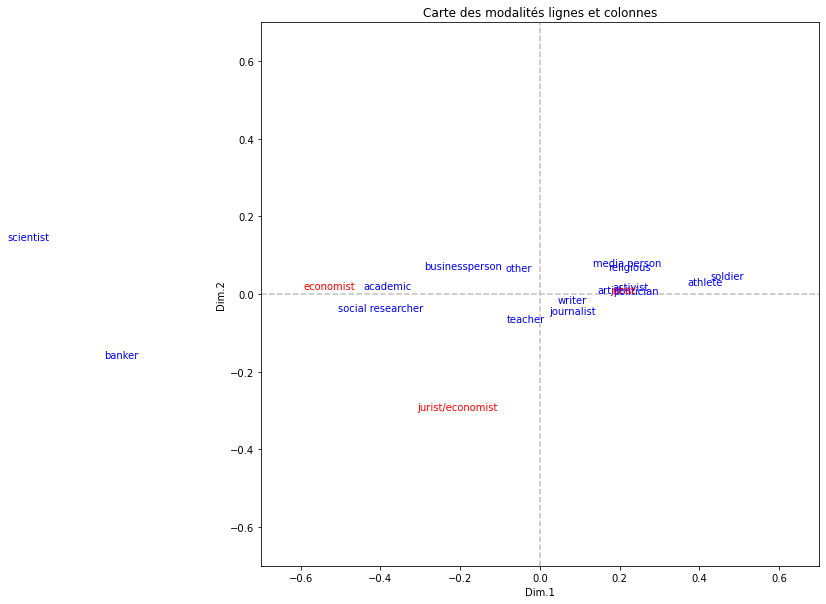

In [128]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes et colonnes")
#modalités ligne
for i in range(contingency.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],contingency.index[i],color='blue')
#modalités colonne
for i in range(contingency.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],contingency.columns[i],color='red')
plt.show()